In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D, BatchNormalization,LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [5]:
height = 224
width = 224
TrainDir = "training/"
ValDir = "validation/"

In [6]:
def GetInput(path):
    X = []
    Y = []
    pos=0
    neg=0
    count=0
    for imgD in os.listdir(path):
        count+=1
        try:
            Dir = os.path.join(path,imgD)
            img = cv2.imread(Dir)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            #print("HEY1")
            img = img.astype(np.float32)
            img_lab = cv2.cvtColor(img,cv2.COLOR_RGB2Lab)
            #print("HEY1")
            img_lab = cv2.resize(img_lab,(width,height))
            
            img_l = img_lab[:,:,0]
            img_ab = img_lab[:,:,1:]
            img_ab = img_ab/128
            
            X.append(img_l)
            Y.append(img_ab)
            pos = pos +1
        except:
            neg = neg +1
        
    X = np.array(X)
    Y = np.array(Y)
        
    return X,Y,pos,neg,count

In [7]:
X,Y,pos,neg,count = GetInput(TrainDir)
X_val,Y_val,pos_v,neg_v,count_v = GetInput(ValDir)

In [8]:
print(pos)
print(neg)
print(count)
print(pos_v)
print(neg_v)
print(count_v)

686
0
686
167
0
167


In [9]:
def GenerateInputs(X,Y):
    X_input = []
    Y_input = []
    for i in range(len(X)):
        X_input.append( X[i].reshape(224,224,1) )
        Y_input.append( Y[i].reshape(224,224,2) )
    X_input = np.array(X_input)
    Y_input = np.array(Y_input)
    return X_input,Y_input
        

In [10]:
X_input,Y_input = GenerateInputs(X,Y)
X_val ,Y_val = GenerateInputs(X_val,Y_val)

In [11]:
def make_model():
    model = Sequential()
    #224
    model.add(Conv2D(16,(3,3),padding='same',input_shape=(height,width,1)))
    model.add(LeakyReLU())
    model.add(Conv2D(32,(3,3),padding='same'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    #112
    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    #56
    model.add(Conv2D(128,(3,3),padding='same'))
    model.add(LeakyReLU())
    model.add(Conv2D(256,(3,3),padding='same'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(UpSampling2D())
    #112
    model.add(Conv2D(256,(3,3),padding='same'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(UpSampling2D())
    #224
    model.add(Conv2D(2,(3,3),activation='tanh',padding='same'))
    model.add(LeakyReLU())
    return model

In [12]:
model = make_model()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      160       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 224, 224, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 224, 224, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      1

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics = ['accuracy'])

In [15]:
history = model.fit(X_input,Y_input,epochs = 20, validation_data=(X_val,Y_val))

Train on 686 samples, validate on 167 samples
Epoch 1/20
686/686 [==============================] - 1464s 2s/sample - loss: 0.2052 - accuracy: 0.7043 - val_loss: 0.5467 - val_accuracy: 0.9951
Epoch 2/20
686/686 [==============================] - 1435s 2s/sample - loss: 0.0203 - accuracy: 0.5309 - val_loss: 0.9878 - val_accuracy: 0.9161
Epoch 3/20
686/686 [==============================] - 3930s 6s/sample - loss: 0.0068 - accuracy: 0.5076 - val_loss: 0.5247 - val_accuracy: 0.0119
Epoch 4/20
686/686 [==============================] - 687s 1s/sample - loss: 0.0048 - accuracy: 0.7500 - val_loss: 0.9768 - val_accuracy: 0.9705
Epoch 5/20
686/686 [==============================] - 651s 949ms/sample - loss: 0.0202 - accuracy: 0.3562 - val_loss: 0.1807 - val_accuracy: 0.0304
Epoch 6/20
686/686 [==============================] - 650s 947ms/sample - loss: 0.0071 - accuracy: 0.4325 - val_loss: 0.1012 - val_accuracy: 0.9949
Epoch 7/20
686/686 [==============================] - 645s 941ms/sample - l

In [16]:
TestImagePath = "check.jpg"

In [17]:
def ExtractTestInput(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
    img = cv2.cvtColor(img , cv2.COLOR_GRAY2RGB)
    img = cv2.cvtColor(img , cv2.COLOR_RGB2Lab)
    
    img  = img.astype(np.float)
    img  = cv2.resize(img,(height,width))
    
    img_l = img[:,:,0]
    img_l = img_l.reshape(1,224,224,1)
    return img_l

In [18]:
image_for_test = ExtractTestInput(TestImagePath)
print(image_for_test.shape)

(1, 224, 224, 1)


In [19]:
prediction = model.predict(image_for_test)

In [20]:
prediction = prediction*128
prediction = prediction.reshape(224,224,2)

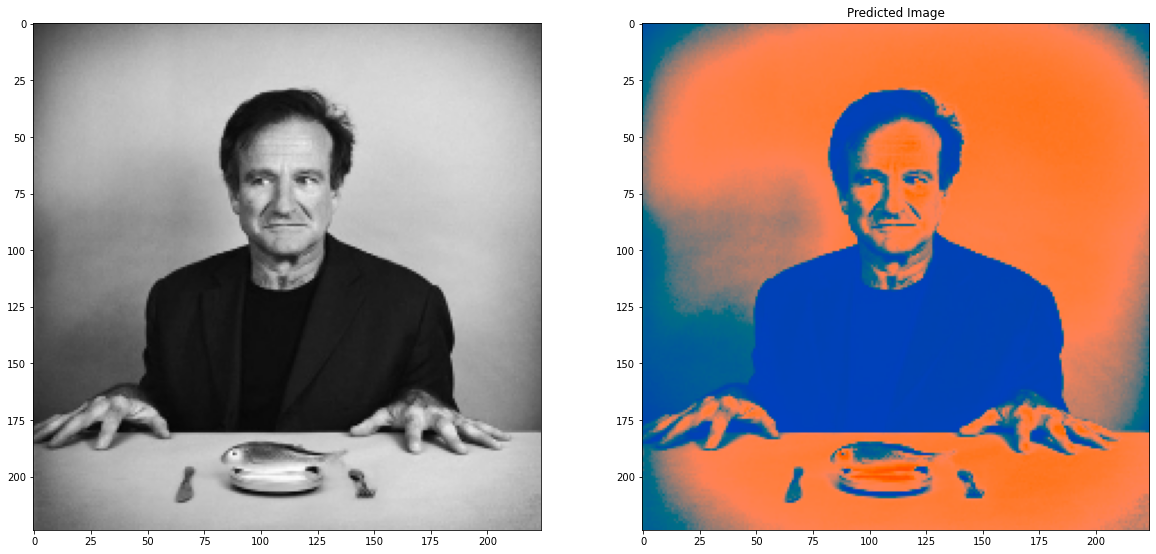

In [21]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
img = cv2.imread(TestImagePath)
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img1 , cv2.COLOR_RGB2GRAY)
img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
img = cv2.resize(img,(224,224))
plt.imshow(img)

plt.subplot(1,2,2)
img2 = cv2.cvtColor(img,cv2.COLOR_RGB2Lab)
img2[:,:,1:] = prediction
img2 = cv2.cvtColor(img,cv2.COLOR_Lab2RGB)
plt.title("Predicted Image")
plt.imshow(img2)

cv2.waitKey(0)
cv2.destroyAllWindows()